In [1]:
%pylab inline
import pandas as pd
import seaborn as sns
sns.set_style('ticks')
sns.set_context('notebook', font_scale=1.5)

Populating the interactive namespace from numpy and matplotlib


In [2]:
import scipy.interpolate as inter
import curveball

In [12]:
filename = "/home/yoavram/Google Drive/ex silico/tecan/Yoav_160315_double_vol_competition.xlsx"
max_time = 15
sheet    = None

In [15]:
maindf = curveball.io.read_tecan_xlsx(filename, ('OD','Green','Red'), max_time=max_time, sheet=sheet)
df = maindf[maindf.Number.isin([1,2,3,4])]
df = df[(df.Number!=4) | (df.Letter!='H')]
#df = maindf[maindf.Number.isin([9,10,11,12])]
#df = df[maindf.Well != 'G12']
#df = df[maindf.Well != 'H12']
#df.Green = df.Red

grp = df.groupby(by=u'Cycle Nr.')
meangrp = grp.mean().reset_index()
stdgrp  = grp.std().reset_index()

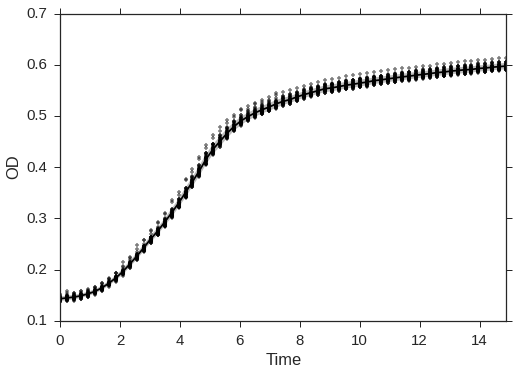

In [16]:
df.plot('Time_OD', 'OD', color='k', marker='.', ls='', grid=False, legend=False, alpha=0.5)
plot(meangrp.Time_OD, meangrp.OD, 'k-')
fill_between(meangrp.Time_OD, y1=meangrp.OD+stdgrp.OD, y2=meangrp.OD-stdgrp.OD, color='gray', alpha=0.5);
xlabel('Time')
ylabel('OD');

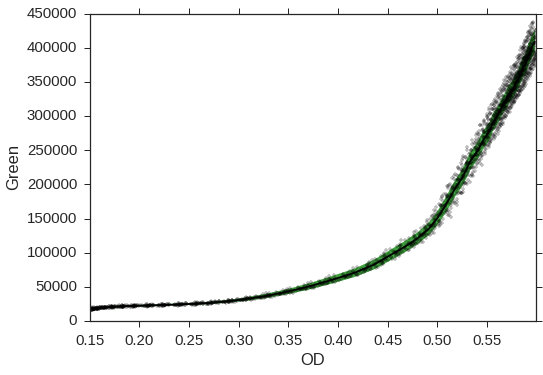

In [19]:
df.plot('OD','Green', color='k', marker='.', ls='', grid=False, legend=False, alpha=0.25)
plot(meangrp.OD, meangrp.Green, 'k-')
fill_between(meangrp.OD, y1=meangrp.Green+stdgrp.Green, y2=meangrp.Green-stdgrp.Green, color='g', alpha=0.75);
ylabel('Green');

## Using `interp1d`

In [20]:
f = inter.interp1d(meangrp.Green, meangrp.OD, 3, bounds_error=False, fill_value=0) 

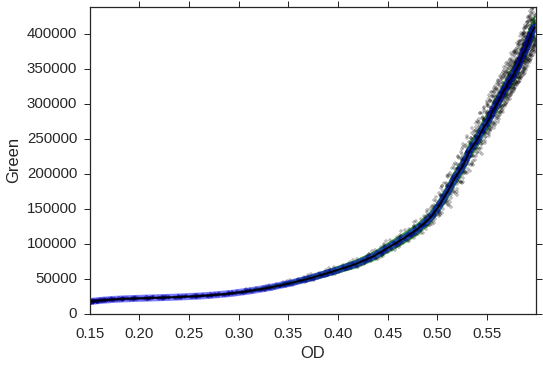

In [24]:
Green = meangrp.Green
OD    = f(Green)

df.plot('OD','Green', color='k', marker='.', ls='', alpha=0.25, grid=False, legend=False)
plot(OD, Green, 'b', lw=7, alpha=0.5)
plot(meangrp.OD, meangrp.Green, 'k-')
fill_between(meangrp.OD, y1=meangrp.Green+stdgrp.Green, y2=meangrp.Green-stdgrp.Green, color='g', alpha=0.75);

ylim(0,df.Green.max())
xlabel('OD')
ylabel('Green');

## Prediction

In [28]:
preddf = maindf[maindf.Number.isin([5,6,7,8])]
preddf = preddf[(preddf.Number!=7) | (preddf.Letter!='H')]
#preddf.Green = preddf.Red

predgrp = preddf.groupby(by=u'Cycle Nr.')
predmeangrp = predgrp.mean().reset_index()
predstdgrp  = predgrp.std().reset_index()

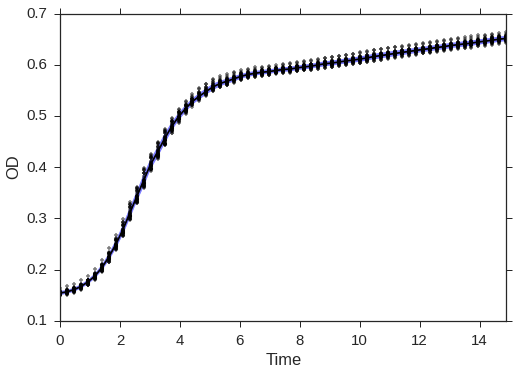

In [29]:
preddf.plot('Time_OD', 'OD', color='k', marker='.', ls='', alpha=0.5, grid=False, legend=False)
plot(predmeangrp.Time_OD, predmeangrp.OD, 'k-')
fill_between(predmeangrp.Time_OD, y1=predmeangrp.OD+predstdgrp.OD, y2=predmeangrp.OD-predstdgrp.OD, color='b', alpha=0.5);
xlabel('Time')
ylabel('OD');

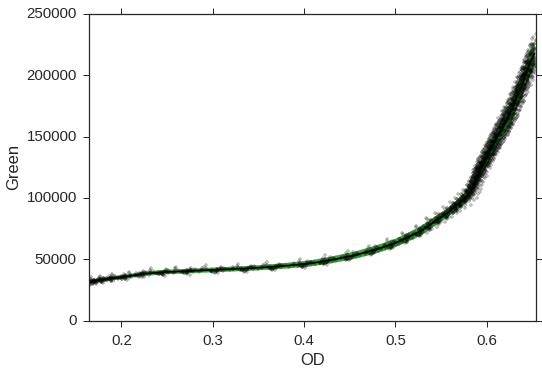

In [33]:
preddf.plot('OD','Green', color='k', marker='.', ls='', alpha=0.25, grid=False, legend=False)
plot(predmeangrp.OD, predmeangrp.Green, 'k-')
fill_between(predmeangrp.OD, y1=predmeangrp.Green+predstdgrp.Green, y2=predmeangrp.Green-predstdgrp.Green, 
             color='g', alpha=0.75);
ylabel('Green');

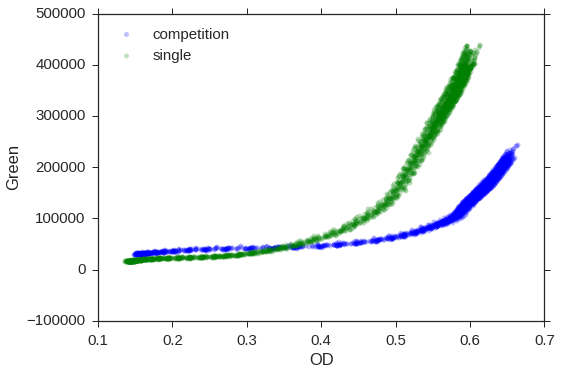

In [34]:
scatter(preddf.OD, preddf.Green, color='b', marker='o', alpha=0.25)
scatter(df.OD, df.Green, color='g', marker='o', alpha=0.25)

legend(['competition', 'single'], loc='upper left')
xlabel('OD')
ylabel('Green');

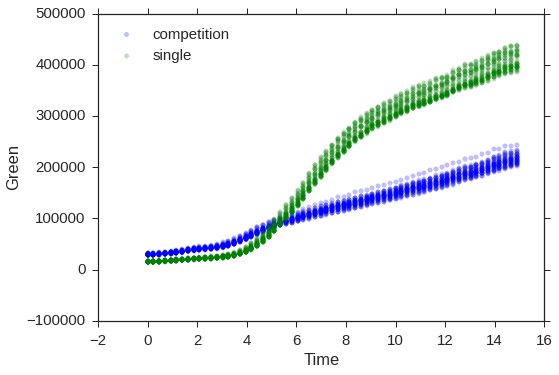

In [35]:
scatter(preddf.Time_Green, preddf.Green, color='b', marker='o', alpha=0.25)
scatter(df.Time_Green, df.Green, color='g', marker='o', alpha=0.25)

legend(['competition', 'single'], loc='upper left')
xlabel('Time')
ylabel('Green');

In [36]:
f = inter.interp1d(meangrp.Green, meangrp.OD, 5, bounds_error=False, fill_value=0) 

In [37]:
preddf['ODhat'] = map(f, preddf.Green)

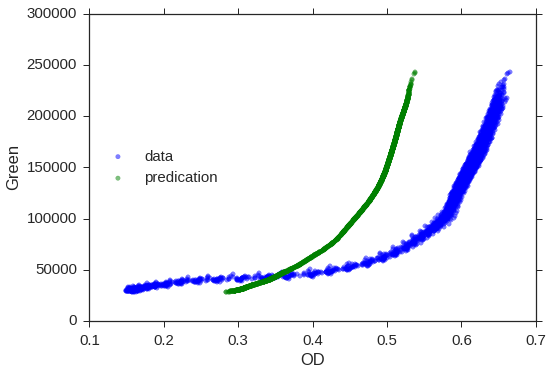

In [38]:
scatter(preddf.OD, preddf.Green, color='b', alpha=0.5)
scatter(preddf.ODhat, preddf.Green, color='g', alpha=0.5)
xlabel('OD')
ylabel('Green')
legend(['data','predication'], loc='center left')

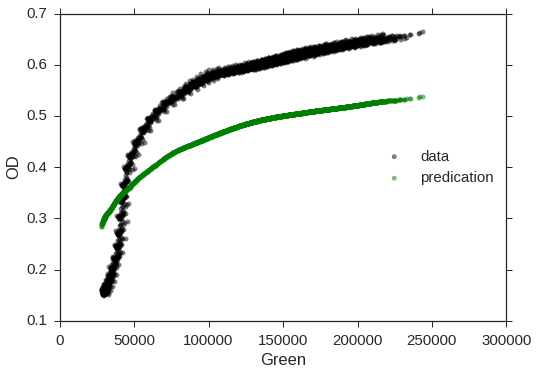

In [39]:
scatter(preddf.Green, preddf.OD, color='k', alpha=0.5)
scatter(preddf.Green, preddf.ODhat, color='g', alpha=0.5)
ylabel('OD')
xlabel('Green')
legend(['data','predication'], loc='center right')

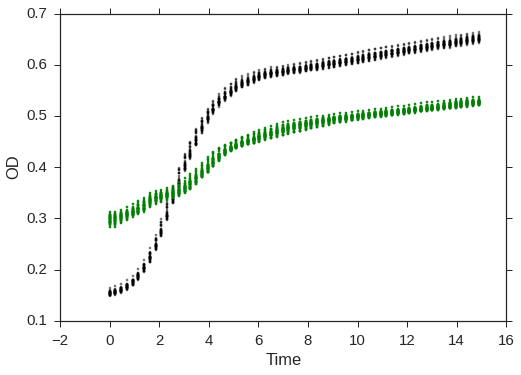

In [44]:
scatter(preddf.Time_OD, preddf.OD, marker='.', color='k', alpha=0.5)
scatter(preddf.Time_Green, preddf.ODhat, marker='.', color='g')
xlabel('Time')
ylabel('OD');

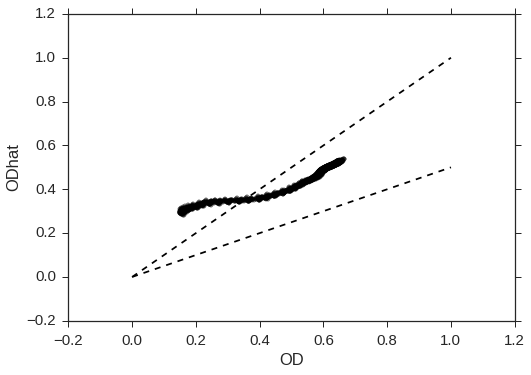

In [45]:
scatter(preddf.OD, preddf.ODhat, marker='o', color='k', alpha=0.5)
ylabel('ODhat')
xlabel('OD')
plot(linspace(0,1), linspace(0,1)/2., 'k--')
plot(linspace(0,1), linspace(0,1), 'k--');